# PHYS F303 - Physique statistique: Travail personnel

#### Cordier Alix & Vandepopeliere Romain - BA3 PHYS

## Table des matières

0. [Introduction](#Introduction)
0. [Challenges](#Travail)
    + [2.1 Génération de distributions statistiques](#Distributions-aléatoires)
        + [2.1.1 Générateurs python de nombres aléatoires](#Challenge-1---Générateurs-python)
        + [2.1.2 Algorithme de Box-Muller](#Challenge-2---Box-Muller)
    + [2.2 Mouvement brownien](#Mouvement-brownien)
        + [2.2.1 Marche aléatoire avec dérive constante](#Challenge-1---Dérive-constante)
        + [2.2.2 Marche aléatoire avec terme de friction](#Challenge-2---Terme-de-friction)
    + [2.3 Modèle d'Ising](#Modèle-d'Ising) 
        + [2.3.1 Estimation de la température de Curie avec l'algorithme de Métropolis](#Challenge-1---Curie )
        + [2.3.2 Diversification de la condition initiale et des conditions aux limites](#Challenge-2---Diversification-de-la-condition-initiale-et-des-conditions-aux-limites)
0. [Conclusion](#Conclusion)

## Introduction

Le but de ce travail est de côtoyer des simulations numériques (Monte-Carlo) de problèmes physiques. Dans un premier temps, nous allons nous familiariser avec les générateurs de nombres aléatoires suivant une distribution désirée. Par la suite, notre étude se portera sur le mouvement brownien et son lien avec le processus de diffusion. Finalement, nous travaillerons sur le modèle d'Ising et, plus particulièrement, nous utiliserons ce dernier pour en apprendre plus sur la transition para-ferromagnétique des métaux.

Avant de commencer, importons les librairies dont on aura besoin :

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

[Retour](#Table-des-matières)

## Travail

### Distributions aléatoires

#### Challenge 1 - Générateurs python

Python possède plusieurs générateurs de nombres aléatoires. En particulier, la librairie $\textrm{NumPy}$ que l'on utilise très régulièrement permet de générer des distributions gaussienne, exponentielle, binomiale, voire même de Poisson. Regardons de plus près à deux d'entre-elles :

+ *Gaussienne*

In [2]:
## Paramètres

N=1000000            #Nombre d'échantillons
mu=-2.0              #Moyenne 
sigma=1.5            #Ecart-type
gauss_sample = numpy.random.normal(mu,sigma,N)

Affichons l'histogramme de la distribution obtenue et comparons-le avec la forme analytique de la pdf (= *probability density function*) gaussienne :
$$p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{- \frac{(x-\mu)^2}{2\sigma^2} } $$

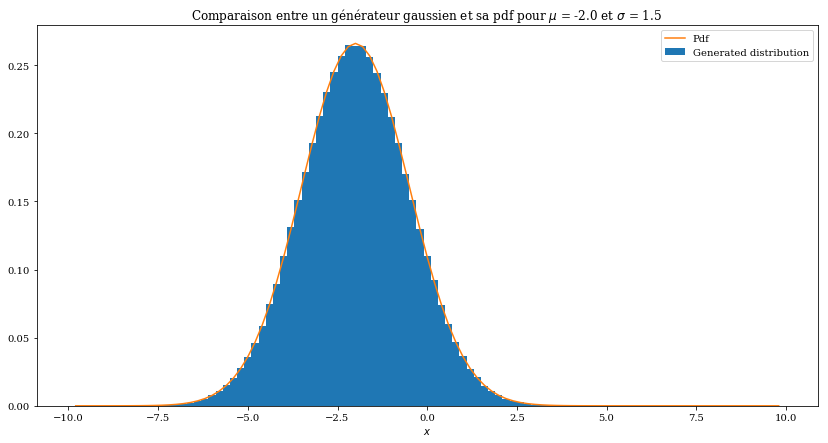

In [3]:
pyplot.figure(figsize=(14,7))
pyplot.title("Comparaison entre un générateur gaussien \
et sa pdf pour $\mu$ = {:.1f} et $\sigma$ = {:.1f} ".format(mu,sigma))
pyplot.xlabel("$x$")

binwidth=0.2
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histogram
pyplot.hist(gauss_sample,bins,normed=True,label="Generated distribution")

# plot the probability density
pyplot.plot(bin_centers,numpy.exp(-(bin_centers-mu)**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2),label="Pdf")

pyplot.legend()

*Remarque* : Lors de ce travail, nous n'indiquerons pas d'unité sur l'axe vertical pour des histogrammes car cet axe représente simplement un nombre d'événements et qui plus est, choisi normalisé pour que les histogrammes puissent être comparés à des densités de probabilité.

 - *Exponentielle*

In [4]:
##Paramètres

N=1000000              #Nombre d'échantillons
Lambda = 2.0           #paramètre (et moyenne) de la distribution
expo_sample = numpy.random.exponential(Lambda,N)

Comparons de nouveau avec la pdf exponentielle associée : 
$$ p(x) = 
\begin{cases} 
\frac{1}{\lambda} e^{-x/\lambda} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases}  $$

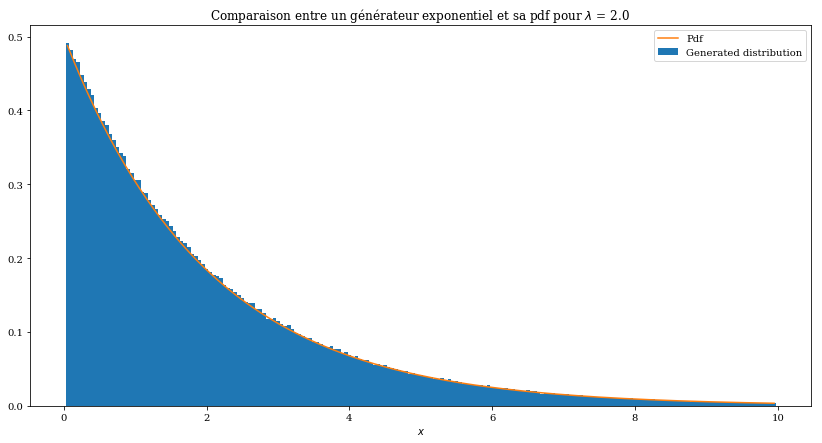

In [5]:
pyplot.figure(figsize=(14,7))
pyplot.title("Comparaison entre un générateur exponentiel et sa pdf pour $\lambda$ = {:.1f} ".format(Lambda))
pyplot.xlabel("$x$")

binwidth=0.05
bins=numpy.arange(0,10,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot the histogram
pyplot.hist(expo_sample,bins,normed=True,label="Generated distribution")

#plot the pdf
pyplot.plot(bin_centers,numpy.exp(-bin_centers/Lambda)/Lambda,label="Pdf")

pyplot.legend()

Dans tous les deux cas, on voit que les distributions générées collent parfaitement avec les pdf et le fit tend vers la perfection pour un très grand nombre $N$ d'échantillons. On conclut que les générateurs python sont très bons. Comme dit précédemment, il y a aussi des générateurs de loi binomiale ou de poisson qui sont des probabilités discrètes mais nous avons choisi de ne pas les représenter car des probabilités continues (et donc des pdf) nous paraissent plus parlantes ici.

#### Challenge 2 - Box-Muller

La méthode de Box-Muller est un algorithme qui permet de générer des pairs de nombres aléatoires indépendants dont la distribution suit une gaussienne. Soient $X$ et $Y$ deux nombres distribués uniformément dans l'intervalle [0,1] 
$$ U_1,U_2 \sim \textrm{Unif}[0,1] $$ 

On définit alors 
$$ R = \sqrt{-2\textrm{ln}(U_1)} $$
$$ \theta = 2\pi U_2$$
pour accéder à deux nouvelles variables 
$$ X = R \, \textrm{cos}(\theta) $$ 
$$ Y = R \, \textrm{sin}(\theta) $$ 
qui sont indépendantes et suivent une distribution normale $X,Y \sim \mathcal{N}(0,1)$. Intuitivement, on peut voir que cette méthode agit de la façon suivante : elle prend des points situés aléatoirement dans le carré unitaire et les remet sous forme polaire pour les distribuer de façon uniforme dans toutes les directions autour de l'origine. Le logarithme dans le rayon permet de diluer le nombre de points rencontrés au fur et à mesure qu'on s'éloigne de l'origine. 

*Remarque*

Pour avoir une distribution normale quelconque $\mathcal{N}(\mu,\sigma^2)$, il suffit de déplacer l'origine ou de modifier le rayon selon 
$$ X = \mu + \sigma \,R \, \textrm{cos}(\theta)$$
$$ Y = \mu + \sigma \,R \, \textrm{sin}(\theta) $$

Testons cet algorithme dès à présent ! 

In [6]:
## Paramètres

N=1000000
mu = -2.0
sigma = 2.0

In [7]:
numpy.random.seed()              #réactualisons la graine pour être certains de l'uniformité
u1=numpy.random.random_sample(N)
u2=numpy.random.random_sample(N)
    
R=(-2*numpy.log(u1))**(1/2)
theta = 2*numpy.pi*u2
    
X=mu+sigma*R*numpy.cos(theta)
Y=mu+sigma*R*numpy.sin(theta)

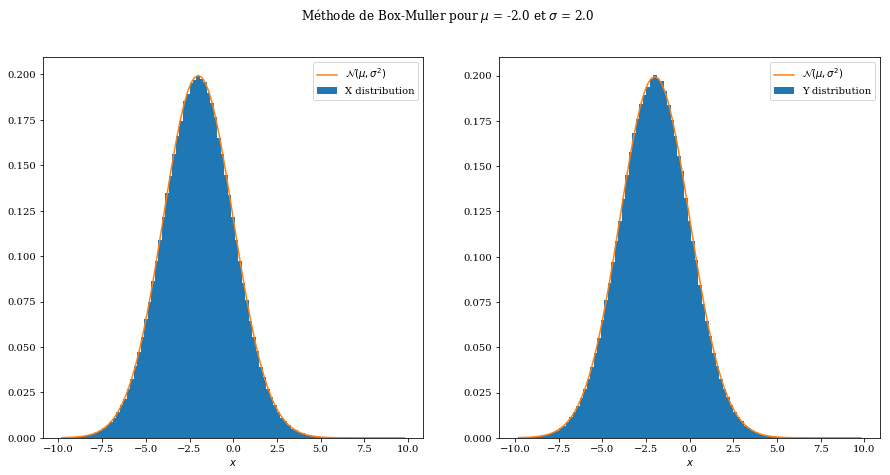

In [8]:
pyplot.figure(figsize=(15,7))

binwidth=0.2
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2
bin_centers = bins[:-1]+binwidth/2


######Subplot 1 


pyplot.subplot(121)
pyplot.hist(X,bins,normed=True,label="X distribution")
pyplot.xlabel("$x$")
pyplot.plot(bin_centers,numpy.exp(-(bin_centers-mu)**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2),\
            label="$\mathcal{N}(\mu,\sigma^2)$")
pyplot.legend()
pyplot.suptitle("Méthode de Box-Muller pour $\mu$ = {:.1f} et $\sigma$ = {:.1f} ".format(mu,sigma))


#####Subplot 2 


pyplot.subplot(122)
pyplot.hist(Y,bins,normed=True,label="Y distribution")
pyplot.xlabel("$x$")
pyplot.plot(bin_centers,numpy.exp(-(bin_centers-mu)**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2),\
            label="$\mathcal{N}(\mu,\sigma^2)$")
pyplot.legend()

[Retour](#Table-des-matières)

### Mouvement brownien

L'équation stochastique (à une dimension) qui décrit le déplacement infinitésimal $dx$ comme 

$$dx=\sqrt{2\alpha dt}\cal{N(0,1)} $$
caractérise un mouvement brownien; par exemple, celui d'une molécule d'encre dans de l'eau. Si l'on prend un échantillon de $N$ particules, il est alors intéressant d'étudier la densité de particules $\rho(x,t)$ donnée par 

$$
\rho(x,t) dx=n(x,t)/N 
$$
où $n(x,t)$ est le nombre de particules se trouvant dans l'intervalle centré en $x$ de largeur $dx$ à l'instant $t$.
Il se trouve que l'évolution de cette densité de particules est exactement décrite par une équation de diffusion caractérisée par le même coefficient $\alpha$ que dans l'équation stochastique : 
$$
\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2} \, .
$$

Si la densité initiale est une gaussienne 
$$ \rho(x,0) = P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} \, , $$
la solution exacte de la densité au cours du temps sera donnée par 
$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu)^2}{2\sigma_t^2}}
$$
avec $\sigma^2_t = 2\alpha t + \sigma^2$.

#### Challenge 1 - Dérive constante

Dans ce challenge, il nous est proposé d'étudier l'équation stochastique précédente à laquelle on ajoute une contribution systématique 
$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)} \, .
$$

Intuitivement, comme il s'agit simplement d'un terme indépendant ajouté, on imagine que le résultat sera le même que précédemment avec un simple décalage  $cT$ (avec $T$ le temps final) en $x$ de la moyenne de la gaussienne. En effet, la  quantité $dx-cdt$ est régie par la même équation stochastique que l'était $dx$ lorsqu'il n'y avait pas de dérive. Ainsi, dans la nouvelle variable $y=x-ct$, on trouve la même équation de diffusion 
$$
\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial y^2} \, 
$$
dont la solution est 
$$
\rho(y,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(y-\mu)^2}{2\sigma_t^2}}
$$
avec $\sigma^2_t = 2\alpha t + \sigma^2$. Si l'on repasse dans la variable $x$, on trouve finalement 
$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu_t)^2}{2\sigma_t^2}}
$$
avec $\mu_t=\mu + ct$ et $\sigma^2_t = 2\alpha t + \sigma^2$.

Vérifions tout ceci avec une simulation.

In [9]:
## Paramètres

npart=100000
sigma = 1.0
alpha=2.0
mu = 0.0
c=1.0
x0 = numpy.random.normal(0,sigma,npart)     #distribution initiale

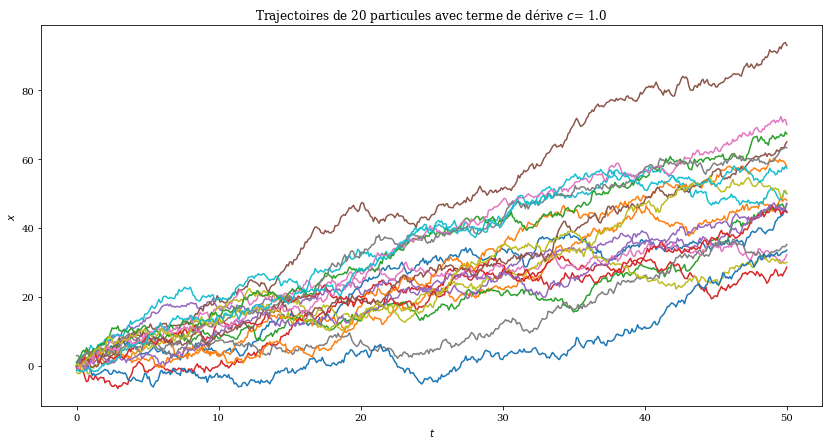

In [10]:
T=50.0
nt=500
dt=T/nt


t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

## Initial condition + evolution
x[0]=x0
for i in range(nt):
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
## Plot settings 
pyplot.figure(figsize=(14,7))
pyplot.title("Trajectoires de 20 particules avec terme de dérive $c$= {:.1f} ".format(c))
pyplot.xlabel("$t$")
pyplot.ylabel("$x$")
for i in range(20):             #on choisit d'afficher 20 trajectoires uniquement
    pyplot.plot(t,x[:,i])

Les particules gardent bien un mouvement brownien tout en dérivant vers les $x$ positifs (car on a choisi $c$ positif). Observons dès lors la distribution finale et regardons si elle correspond bien à une gaussienne shiftée de $ct$ vers la droite (i.e. $x$ positifs).

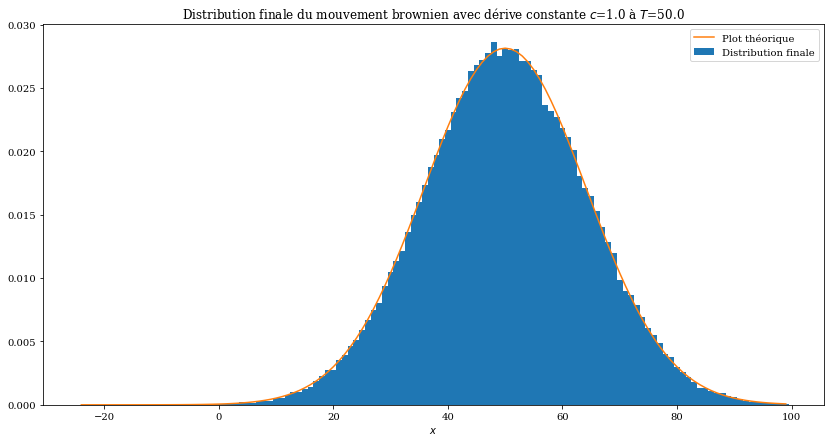

In [11]:
fig=pyplot.figure(figsize=(14,7))
pyplot.title("Distribution finale du mouvement brownien avec dérive constante $c$={:.1f} \
à $T$={:.1f}".format(c,T))
pyplot.xlabel("$x$")

#bins settings
binwidth=1.0
bins=numpy.arange(-25,100,binwidth)
bins = bins + binwidth/2
bin_centers = bins[:-1]+binwidth/2

#histogram plot
pyplot.hist(x[nt],bins,normed=True,label="Distribution finale");

#gaussian plot
sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2),\
           label="Plot théorique")

pyplot.legend()

Parfait ! On retrouve bien une gaussienne translatée comme on l'avait imaginé en théorie.

#### Challenge 2 - Terme de friction

Cette fois, on nous propose de modifier l'équation stochastique en rajoutant un terme de friction :
$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)} \,
$$
Ce problème n'est plus résoluble aussi facilement que le dernier car ce n'est pas un terme indépendant qui est rajouté. Ce $-\gamma x dt$ (avec $\gamma > 0$ !) tend à ramener les particules vers la position $x=0$. En effet, si une particule se trouve dans les $x$ positifs, ce terme sera négatif donc la particule descendera vers le 0 à l'étape suivante. Inversément, si elle se trouve dans les $x$ négatifs, elle devra monter vers le 0. Attention, il s'agit juste d'un raisonnement intuitif, il y a en réalité une lutte entre ce fameux terme et le second, responsable du caractère alétoire. Ce n'est donc pas simplement $dx>0$ si $x<0$ (i.e. la particule remonte) et $dx<0$ si $x>0$ (i.e. la particule descend); ce raisonnement permet d'appréhender le comportement global des particules. 

Dès lors, la question à se poser est la suivante : à quel point cette friction ramène-t-elle les particules vers $x=0$ ? 

Pour y répondre, laissons tomber le terme de marche aléatoire, on a alors
$$ dx= -\gamma x dt \, .$$
Cette équation est facilement résoluble : 
$$ x(t) = x(0)\, e^{-\gamma t } \, .$$
Lors des simulations, on voit à partir d'un certain temps que la distribution finale est une distribution stationnaire, d'équilibre qui ressemble à une gaussienne (on supposera que c'en est une). En vue de ce que l'on vient de trouver, on peut imaginer que la moyenne finale sera alors donnée par 
$$\mu_t = \mu e^{-\gamma t} \, .$$
On se retrouverait alors avec une gaussienne centrée autour de 0 pour $t$ très grand; c'est ce à quoi on s'attendait.

Le problème maintenant est de trouver l'écart-type. Pour ce faire, nous avons lancé une panoplie de simulations en faisant varier les paramètres et en étudiant à chaque fois l'écart-type qui procurait le meilleur fit de la distribution obtenue. Par mimétisme avec les cas précédents, nous avons imaginé un écart-type égal au précédent mais multiplié par un certain facteur. On a constaté logiquement que plus $\gamma$ était élevé, plus la friction était importante et plus les particules venaient se serrer près de $x=0$. La variance pouvait donc être inversément proportionnel à $\gamma$. Une version qui semblait valable était la suivante : 
$$ \sigma^2_t = (2\alpha t + \sigma^2) \frac{1}{2\gamma t}$$
En effet, regardons aux simulations avec cette variance.

In [12]:
## Paramètres

npart=100000
sigma = 1.0
alpha=2.0
mu = 12.0                                #moyenne non nulle pour voir la convergence vers x=0
gamma=1.0
x0 = numpy.random.normal(mu,sigma,npart) #distribution initiale

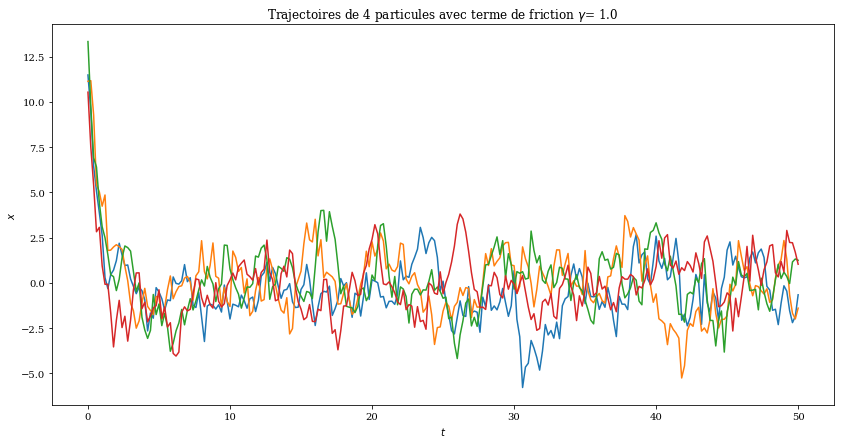

In [13]:
T=50.0
dt=0.20
nt=int(T/dt)
t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

## Initial condition + evolution
x[0]=x0
for i in range(nt):
    x[i+1]=x[i]-gamma*dt*x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
    
## Plot settings
pyplot.figure(figsize=(14,7))
pyplot.title("Trajectoires de 4 particules avec terme de friction $\gamma$= {:.1f}".format(gamma))
pyplot.xlabel("$t$")
pyplot.ylabel("$x$")
for i in range(4):                #affichons 4 particules uniquement
    pyplot.plot(t,x[:,i])

On aperçoit bien que les 4 particules initialement près de $x=12$, se rapprochent de $x=0$ puis oscillent aléatoirement autour de cette position sans jamais trop s'en éloigner.

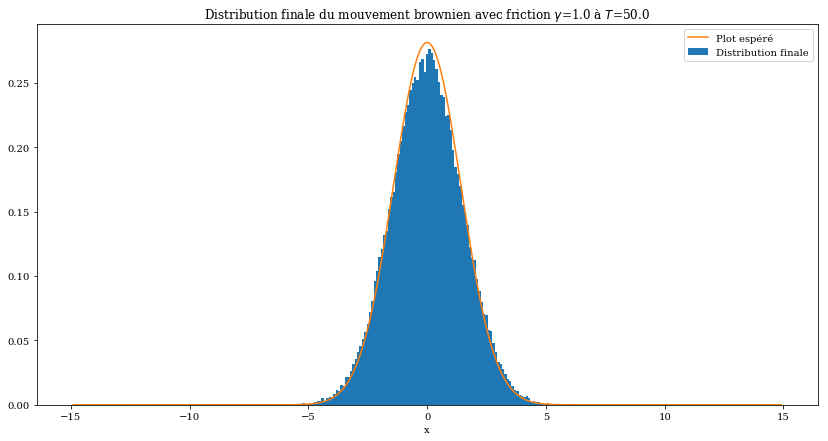

In [14]:
pyplot.figure(figsize=(14,7))
pyplot.title("Distribution finale du mouvement brownien avec friction $\gamma$={:.1f} \
à $T$={:.1f}".format(gamma,T))
pyplot.xlabel("x")

#bins settings
binwidth=0.1
bins=numpy.arange(-15,15,binwidth)
bins = bins + binwidth/2
bin_centers = bins[:-1]+binwidth/2

#histogram plot
pyplot.hist(x[nt],bins,normed=True,label="Distribution finale");

#gaussian plot
sigmat2= (2*alpha*T+sigma**2)/(T*2.0*gamma)
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu*numpy.exp(-gamma*T))**2/(2.0*sigmat2))\
            /numpy.sqrt(2*numpy.pi*sigmat2),label="Plot espéré")

pyplot.legend()

Le fit n'est cependant pas excellent et cela se remarque encore plus lorsque l'on fait varier plus "méchamment" les paramètres; en particulier lorsque $\gamma$ devient grand. Cette variance n'est donc pas correcte mais, au cours de nos nombreux essais à $t$ grand, nous avons remarqué que la variance était proche de $\alpha/ \gamma$. De plus, il se trouve que 
$$ \sigma^2_t = \frac{2\alpha t + \sigma^2}{2\gamma t} \rightarrow \frac{\alpha}{\gamma} \, \, \textrm {pour} \, t \rightarrow + \infty $$
donc nous pensons avoir obtenu la bonne limite pour la variance de cette distribution à $t$ grand, i.e. quand elle est stationnaire. La véritable expression de la variance en fonction du temps est probablement de forme bien plus complexe que celle que l'on a cherchée; avec, pourquoi pas, une exponentielle comme c'était le cas pour la moyenne.

En conclusion, nous avons trouvé que cette équation stochastique menait à un état stable pour la densité de particules qui était toujours donnée par une gaussienne 
$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu_t)^2}{2\sigma_t^2}}
$$
avec $\mu_t=\mu e^{-\gamma t}$ et $\sigma^2_t$ inconnu mais tel quel $\sigma^2_t \rightarrow \frac{\alpha}{\gamma} \, \, \textrm {pour} \, t \rightarrow + \infty $.


*Remarque* : Nous avons vu que lorsque l'on augmentait la valeur de $\gamma$, l'équation devenait instable car le résultat n'avait plus aucun sens. Dans ce cas, il fallait diminuer le pas $dt$ pour que cela reste correct. Cette compétition entre $\gamma$ et $dt$ vient du premier terme de l'équation stochastique qui recquiert un certain équilibre entre ces deux facteurs. C'est la raison pour laquelle, par sécurité, nous avons modifié le code de la simulation en fixant un $dt$ petit et donc en laissant libre le nombre de time-steps $n_t=T/dt$.

[Retour](#Table-des-matières)

### Modèle d'Ising

Dans cette partie du notebook, nous allons nous attarder sur les matériaux ferromagnétiques. Ces matériaux ont la capacité de présenter une magnétisation en l'absence de champ magnétique extérieur. Cependant, on n'observe cette propriété qu'en-dessous de la température de Curie. A cette température, on parle alors de transition de phase du matériau ferromagnétique vu que ses propriétés changent. Nous allons tenter d'étudier cette transition de phase à l'aide du modèle d'Ising. Dans ce modèle, le matériau peut être vu comme une grille régulière de dipôles/spins (représentant les atomes du matériau et agissant comme des aimants) qui peuvent pointer vers le haut ou vers le bas.

Commençons par réintroduire toutes les fonctions dont nous aurons besoin par la suite. Dans tout ce qui suit, on considère $k_BT$ comme étant une unité d'énergie. On définit alors $\alpha$ comme étant la constante de couplage $J$ pour une paire de spins (utilisée pour calculer les énergies) dans la nouvelle échelle d'énergie: $\alpha=J/k_BT$.

On définit d'abord la fonction "energy_at_site" qui nous fournit la contribution à l'énergie d'un spin sigma choisi, placé en $(ix;iy)$ dans la grille de spins (réseau sp) d'un matériau de constante de couplage alpha (cette contribution est proportionnelle au produit du spin sigma avec la somme des spins qui lui sont voisins). On considère pour ce réseau des conditions aux limites périodiques, d'où la présence du modulo.

In [15]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

On définit également la fonction "metropolis-at_site" qui regarde le spin situé à l'emplacement $(ix;iy)$ dans la grille sp d'un matériau, qui le modifie si c'est énergétiquement avantageux (c'est-à-dire si $\Delta E=E_{spin~changé}-E_{spin~initial}<0$) et qui le modifie avec une probabilité $p=e^{-\Delta E}$ si ça ne l'est pas (c'est-à-dire si $\Delta E=E_{spin~changé}-E_{spin~initial}>0$).

In [16]:
def metropolis_at_site(sp,alpha,ix,iy):

    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Finalement, on introduit la fonction "ising_model_metropolis". Cette fonction permet de générer une série de NMC états à partir d'un état initial sp (grille $nx \times ny$) en changeant des spins situés à des emplacements aléatoires si la condition de l'algorithme de Metropolis est satisfaite. On effectue $nx \times ny$ fois l'algorithme de Metropolis entre 2 états gardés, cela permet de s'assurer que le système change de façon significative et donc que les états gardés sont bien représentatifs et apparaissent dans des proportions correctes.

In [17]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

#### Challenge 1 - Curie

Comme nous l'avons dit avant, le matériau ferromagnétique considéré dans ce module subit une transition de phase à une certaine température, appelée température critique $T_c$, et donc à une certaine constante de couplage critique $\alpha_c$. Nous allons tenter de déterminer approximativement la valeur de $\alpha_c$.

Dans un premier temps, nous allons partir d'un état initial présentant uniquement des spins up et nous allons utiliser la fonction "ising_model_metropolis" pour générer une série d'états à partir de celui-ci pour des valeurs de $\alpha$ comprises entre 0 et 1. On commence par le faire grossièrement pour quelques $\alpha$ pris au hasard pour avoir une première idée du comportement de notre système.

In [18]:
nx=50                     # dimensions de la grille   
ny=50
sp = numpy.ones([nx,ny])   # état initial
NMC=100                    # nombre d'états générés

In [19]:
alpha=0.2
states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.4
states_0_4 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.45
states_0_45 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.6
states_0_6 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

Pour chacun de ces $\alpha$, on peut calculer la magnétisation de chaque état généré et regarder l'évolution de celle-ci au fil des itérations. La magnétisation d'un état est obtenue en faisant la somme des spins de cet état.

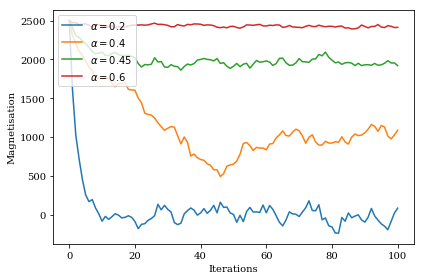

In [20]:
pyplot.figure()
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_45.sum(axis=(1,2)),label=r'$\alpha=0.45$')
pyplot.plot(states_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.legend(loc=2, prop={'size':10})
pyplot.xlabel('Iterations')
pyplot.ylabel('Magnetisation')
pyplot.tight_layout()

Comme prévu, aux grandes températures (petits $\alpha$), la magnétisation chute rapidement et aux petites températures (grands $\alpha$), le matériau garde sa magnétisation. De plus, on voit que pour des $\alpha$ allant de environ 0.4 à plus de 0.45, 100 itérations ne sont pas suffisantes pour observer une stabilisation de la magnétisation ($\alpha_c$ se situe donc probablement dans cette zone).

Nous allons maintenant tenter d'estimer plus précisément $\alpha_c$. Pour ce faire, nous allons prendre plus de valeurs de $\alpha$ et calculer la magnétisation moyenne du système (état initial de spins up) pour chacun de ces $\alpha$. Le $\alpha$ à partir duquel la magnétisation moyenne commencera à différer significativement de 0 sera approximativement le $\alpha_c$ recherché. Cependant, cette magnétisation moyenne doit se calculer lorsque le système a atteint l'équilibre, il faut donc veiller à ne pas utiliser des états correspondant à la transition de phase. Pour les grandes et les petites valeurs de $\alpha$, on pourra ne retirer qu'une centaine d'itérations par exemple avant de calculer la magnétisation. Par contre, pour les valeurs intermédiaires, on devra retirer un nombre d'itérations beaucoup plus important.

En regénérant une série d'états avec beaucoup plus d'itérations pour un certain nombre de valeurs de $\alpha$ et en reportant l'évolution de la magnétisation en graphique, on a pu déterminer approximativement quand la magnétisation se stabilisait (nous ne mettrons pas ces opérations dans le notebook vu leur temps d'exécution). A partir de ces observations, on a finalement fait le choix de garder les états après la 100ème itération pour les $\alpha$ inférieurs à 0.4 (exclus) et supérieurs à 0.5 (inclus) pour le calcul de la magnétisation, et de garder les états après la 1200ème itération pour les $\alpha$ restants.

Réappliquons donc "ising_model_metropolis" avec un nombre d'itérations différent en fonction de $\alpha$ (on prend des valeurs de $\alpha$ de 0 à 1 par pas de 0.05).

In [21]:
nx=50    
ny=50
sp = numpy.ones([nx,ny])

NMC1=200       # itérations pour 0<=alpha<0.4
NMC2=1300      # itérations pour 0.4<=alpha<0.5
NMC3=200       # itérations pour 0.5<=alpha<=1

alpha_array_1=numpy.arange(0.0,0.4, 0.05)
alpha_array_2=numpy.arange(0.4,0.5, 0.05)
alpha_array_3=numpy.arange(0.5,1.05, 0.05)

N_alpha_1=alpha_array_1.size
N_alpha_2=alpha_array_2.size
N_alpha_3=alpha_array_3.size

In [ ]:
states_alpha_1 = numpy.empty([N_alpha_1,NMC1+1,nx,ny])
states_alpha_2 = numpy.empty([N_alpha_2,NMC2+1,nx,ny])
states_alpha_3 = numpy.empty([N_alpha_3,NMC3+1,nx,ny])

for i in range(N_alpha_1):
    sp = numpy.ones([nx,ny])
    states_alpha_1[i] = ising_model_metropolis(sp, NMC1, nx, ny, alpha_array_1[i])

for i in range(N_alpha_2):
    sp = numpy.ones([nx,ny])
    states_alpha_2[i] = ising_model_metropolis(sp, NMC2, nx, ny, alpha_array_2[i])

for i in range(N_alpha_3):
    sp = numpy.ones([nx,ny])
    states_alpha_3[i] = ising_model_metropolis(sp, NMC3, nx, ny, alpha_array_3[i])

Grâce à l'utilisation de l'algorithme Metropolis, la magnétisation moyenne pour $\alpha$ donné peut être calculée de la manière suivante:
$$<M> = \frac{\sum_k M_k}{N_k}$$
où on somme sur les états générés après la transition de phase (les états sont déjà dans les bonnes proportions). 

Pour gagner du temps par la suite pour le calcul des magnétisations moyennes, définissons la fonction "magn_moy" qui prend des valeurs de $\alpha$ (alpha_array), les états générés pour ces $\alpha$ (states_alpha), le nombre d'états/d'itérations (NMC) et l'itération à partir de laquelle on sélectionne les états pour calculer les moyennes (num_etat) et renvoie les magnétisations moyennes pour chaque valeur de $\alpha$.

In [30]:
def magn_moy(alpha_array,states_alpha,NMC,num_etat):
    
    N_alpha=alpha_array.size
    magn_etats_alpha=numpy.empty([N_alpha,NMC+1]) #magn. de chaque état pour différents alpha 
    magn_moy_alpha_coupee=numpy.empty([N_alpha])  #magn. moyenne pour différents alpha

    for i in range(N_alpha):
        magn_etats_alpha[i] = states_alpha[i].sum(axis=(1,2)) 
        magn_moy_alpha_coupee[i]=(sum(magn_etats_alpha[i][num_etat:]))/(NMC+1-num_etat) #on calcule la moy. à partir de l'itération num_etat
     
    return magn_moy_alpha_coupee #tableau de magnétisations moyennes pour différents alpha

On peut maintenant calculer les magnétisations à l'équilibre:

In [31]:
magn_moy_alpha_coupee_1=numpy.empty([N_alpha_1])
magn_moy_alpha_coupee_2=numpy.empty([N_alpha_2])
magn_moy_alpha_coupee_3=numpy.empty([N_alpha_3])

magn_moy_alpha_coupee_1=magn_moy(alpha_array_1,states_alpha_1,NMC1,101)
magn_moy_alpha_coupee_2=magn_moy(alpha_array_2,states_alpha_2,NMC2,1201)
magn_moy_alpha_coupee_3=magn_moy(alpha_array_3,states_alpha_3,NMC3,101)

On a bien veillé à calculer les magnétisations pour un même nombre d'états (100 dans notre cas).

Rassemblons les magnétisations moyennes pour les différents $\alpha$ et observons l'allure du graphique obtenu.

In [32]:
alpha_array=numpy.arange(0.0,1.05, 0.05)
magn_moy_alpha_coupee=numpy.concatenate((magn_moy_alpha_coupee_1,magn_moy_alpha_coupee_2,magn_moy_alpha_coupee_3))

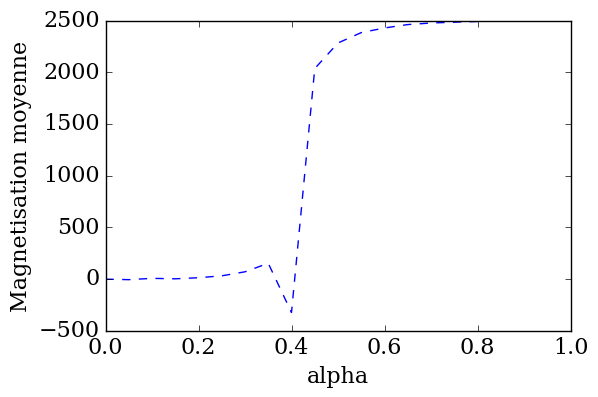

In [33]:
pyplot.figure()
pyplot.plot(alpha_array,magn_moy_alpha_coupee,"--")
pyplot.xlabel('alpha')
pyplot.ylabel('Magnetisation moyenne')

A nouveau, on observe que la transition semble avoir lieu à une valeur $\alpha_c$ entre 0,4 et 0,45 car c'est dans cet intervalle que la magnétisation moyenne devient subitement non nulle.

Regardons si la valeur obtenue approximativement est compatible avec la solution exacte d'Onsager pour le système. Sur la page https://en.wikipedia.org/wiki/Square-lattice_Ising_model, on voit qu'on a la relation suivante pour la température critique:
$$k_BT_c/J \approx 2.26918531421$$


En inversant cette relation, on trouve $\alpha_c \approx 0,44$, ce qui se recoupe bien avec nos prédictions.

Nous allons maintenant faire la même démarche que précédemment, mais cette fois pour l'énergie moyenne. Tout comme on l'a fait pour la magnétisation moyenne, on calculera l'énergie moyenne sans compter les valeurs d'énergie pendant la transition.

L'énergie d'un état est donnée par:
$$E=-\alpha\sum_{pairs(i,j)} s_i s_j,$$
où on effectue une somme sur les paires de spins voisins. Nous allons donc utiliser la fonction "energy_at_site" précedemment définie pour calculer cette énergie. Remarquons cependant que dans la définition de cette fonction, on a considéré des conditions aux limites périodiques, par conséquent, on a des termes d'énergie relatifs à des spins de bords opposés qui s'ajoutent à l'énergie totale ("termes en trop"). Cependant, cela ne pose aucun problème vu qu'on peut considérer que notre grille est un échantillon de système. De plus, cette contribution est négligeable dans la limite des grandes grilles.

Grâce à l'utilisation de l'algorithme Metropolis, l'énergie moyenne se calculera finalement par:
$$<E> = \frac{\sum_k E_k}{N_k}$$
où on somme sur les états générés après la transition de phase.

Pour ne pas surcharger le code pour les calculs d'énergie, on définit une fonction "en_moy" qui prend des valeurs de $\alpha$ (alpha_array), les états générés pour ces $\alpha$ (states_alpha), le nombre d'états/d'itérations (NMC) et l'itération à partir de laquelle on sélectionne les états pour calculer les moyennes (num_etat).

In [34]:
def en_moy(alpha_array,states_alpha,NMC,num_etat):

    N_alpha=alpha_array.size
    en_moy_alpha=numpy.empty([N_alpha])   #énergies moyennes pour différents alpha

    for i in range(N_alpha):
        en_tot=0.0
        for nmc in range(num_etat,NMC+1): #on somme sur états après la transition
            grillesp = states_alpha[i,nmc]
            en_etat=0.0
            for ix in range(nx):
                for iy in range(ny):
                    en_carre = energy_at_site(grillesp,alpha_array[i],grillesp[ix,iy],ix,iy) #énergie dipôle et ses voisins
                    en_etat = en_etat + en_carre #on somme sur tous les dipôles
            en_etat=en_etat/2                    #pour ne pas compter 2 fois une paire
            en_tot = en_tot + en_etat
        en_moy = en_tot/(NMC+1-num_etat)  #on divise par le nombre d'états utilisés
        en_moy_alpha[i] = en_moy          #énergie moy. pour un alpha
    
    return en_moy_alpha  

On calcule les énergies moyennes à l'équilibre:

In [35]:
en_moy_alpha_1=numpy.empty([N_alpha_1])
en_moy_alpha_2=numpy.empty([N_alpha_2])
en_moy_alpha_3=numpy.empty([N_alpha_3])

en_moy_alpha_1=en_moy(alpha_array_1,states_alpha_1,NMC1,101)
en_moy_alpha_2=en_moy(alpha_array_2,states_alpha_2,NMC2,1201)
en_moy_alpha_3=en_moy(alpha_array_3,states_alpha_3,NMC3,101)

On rassemble les énergies moyennes:

In [36]:
en_moy_alpha=numpy.concatenate((en_moy_alpha_1,en_moy_alpha_2,en_moy_alpha_3))

On peut alors porter en graphique l'énergie moyenne en fonction de $\alpha$:

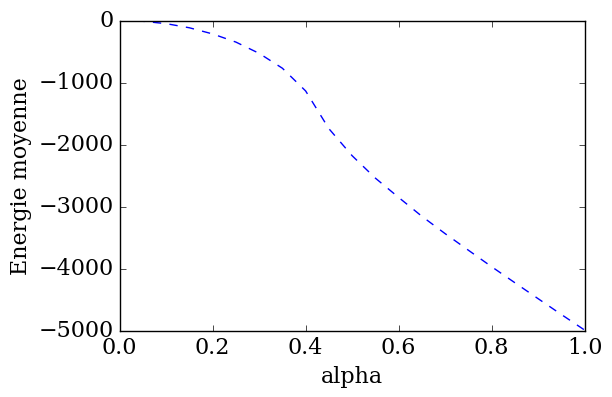

In [37]:
pyplot.figure()
pyplot.plot(alpha_array,en_moy_alpha,"--")
pyplot.xlabel('alpha')
pyplot.ylabel('Energie moyenne')

Ce graphique nous conforte encore dans nos résultats précédents. 
Pour des grandes valeurs de $\alpha$ (supérieures à 0,5), le comportement de l'énergie moyenne paraît linéaire. Ceci semble logique vu que à ces valeurs de $\alpha$, le système garde environ sa magnétisation initiale, qui est la magnétisation maximale (tous les spins de même direction). La magnétisation moyenne vaut alors environ la magnétisation maximale. L'énergie moyenne vaut donc environ l'énergie minimale pour ces $\alpha$, c'est-à-dire $-\alpha N_{pairs}$ (par la formule vue plus haut): on est bien dans une région où l'énergie moyenne dépend linéairement de $\alpha$. De plus, nous sommes dans le cas d'une grille de spins $50 \times 50$, par conséquent, le nombre de paires est donné par $N_{pairs}=2.50.(50-1)=4900$. En $\alpha=1$, on devrait donc avoir une énergie moyenne de l'ordre de -4900, ce qui est plus ou moins le cas (la valeur obtenue est un peu inférieure à l'énergie -4900, ceci est probablement lié aux termes d'énergie supplémentaires causés par les conditions aux bords périodiques).

Pour les $\alpha$ inférieurs à 0,5 la dépendance n'est plus linéaire vu que la magnétisation moyenne devient inférieure à la magnétisation maximale. C'est donc bien à une valeur un peu inférieure à 0,5 qu'on trouvera $\alpha_c$.

#### Challenge 2 - Diversification de la condition initiale et des conditions aux limites

Nous allons maintenant recommencer la même démarche que pour le challenge 1 mais cette fois en modifiant la condition initiale et en imposant des conditions aux bords. On a choisi de prendre comme condition initiale une grille dont tous les spins situés sur les bords sont up et dont les autres sont orientés aléatoirement. De plus, on impose comme condition aux limites que tous les spins du bord restent up. Commençons par définir la fonction "initial_state" qui va engendrer notre grille de spins initiale:

In [38]:
def initial_state(nx,ny):
       
    r = numpy.random.randint(0,2,(nx,ny))
    
    r[r==0] =-1
    
    r[0,:]=1
    r[nx-1,:]=1
    r[:,0]=1
    r[:,ny-1]=1

    return r

Pour imposer les conditions aux limites voulues, nous allons devoir modifier la fonction "ising_model_metropolis" définie précédemment.

In [39]:
def ising_model_metropolis_CL(sp, NMC, nx, ny, alpha):
    
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):               # on aurait pu mettre (nx-2)*(ny-2) idem
            ix=numpy.random.randint(1,nx-1)    # on ne change jamais les spins sur les bords
            iy=numpy.random.randint(1,ny-1)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Comme on l'a déjà fait dans le challenge précédent, on commence par regarder l'évolution de la magnétisation au cours des itérations pour quelques valeurs de $\alpha$ pour savoir à quoi s'attendre.

In [98]:
nx=45 
ny=45
sp2=initial_state(nx,ny)
NMC=300

In [99]:
sp2_copie=sp2.copy()
alpha=0.2
states_0_2_CL = ising_model_metropolis_CL(sp2_copie, NMC, nx, ny, alpha)

sp2_copie=sp2.copy()
alpha=0.45
states_0_45_CL = ising_model_metropolis_CL(sp2_copie, NMC, nx, ny, alpha)


sp2_copie=sp2.copy()
alpha=0.6
states_0_6_CL = ising_model_metropolis_CL(sp2_copie, NMC, nx, ny, alpha)

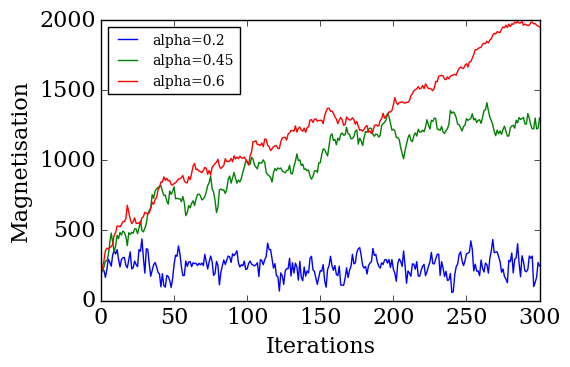

In [121]:
pyplot.figure()
pyplot.plot(states_0_2_CL.sum(axis=(1,2)),label=r'alpha=0.2')
pyplot.plot(states_0_45_CL.sum(axis=(1,2)),label=r'alpha=0.45')
pyplot.plot(states_0_6_CL.sum(axis=(1,2)),label=r'alpha=0.6')
pyplot.legend(loc=2, prop={'size':10})
pyplot.xlabel('Iterations')
pyplot.ylabel('Magnetisation')
pyplot.tight_layout()

*Remarque:* nous avons fait le choix de prendre une grille $45 \times 45$ car en gardant une grille $50 \times 50$ comme précédemment, les fluctuations de la magnétisation étaient très importantes et il fallait attendre un très grand nombre d'itérations avant de parvenir à l'équilibre pour la plupart des alpha. Le temps de calcul des moyennes à l'équilibre aurait alors été beaucoup trop long.

Comme avant, pour différents $\alpha$, on a généré des séries d'états avec beaucoup plus d'itérations et on a regardé approximativement à partir de quel nombre d'itérations la magnétisation se stabilisait. Encore une fois, on ne mettra pas toutes ces démarches dans le notebook pour ne pas le surcharger et pour éviter les longs temps d'exécution. On a observé que l'équilibre était environ atteint:
* après la 100ème itération pour les valeurs de $\alpha$ comprises entre 0 et 0.4 (non inclus)
* après la 300ème itération pour les valeurs de $\alpha$ comprises entre 0.4 (inclus) et 1

Réappliquons "ising_model_metropolis" avec un nombre d'itérations différent en fonction de la valeur de $\alpha$ (on prend des valeurs de $\alpha$ de 0 à 1 par pas de 0.05).

In [101]:
nx=45
ny=45

NMC1=200
NMC2=400

alpha_array_1=numpy.arange(0.0,0.4, 0.05)
alpha_array_2=numpy.arange(0.4,1.05,0.05)

N_alpha_1=alpha_array_1.size
N_alpha_2=alpha_array_2.size

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35]
[ 0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95
  1.  ]


In [129]:
# environ 4 min d'exécution
states_alpha_1 = numpy.empty([N_alpha_1,NMC1+1,nx,ny])
states_alpha_2 = numpy.empty([N_alpha_2,NMC2+1,nx,ny])

for i in range(N_alpha_1):
    sp2_copie=sp2.copy()
    states_alpha_1[i] = ising_model_metropolis(sp2_copie, NMC1, nx, ny, alpha_array_1[i])
    
for i in range(N_alpha_2):
    sp2_copie=sp2.copy()
    states_alpha_2[i] = ising_model_metropolis(sp2_copie, NMC2, nx, ny, alpha_array_2[i])

Avec la fonction définie dans le challenge 1, on peut calculer les magnétisations moyennes à l'équilibre:

In [115]:
magn_moy_alpha_coupee_1=numpy.empty([N_alpha_1])
magn_moy_alpha_coupee_2=numpy.empty([N_alpha_2])

magn_moy_alpha_coupee_1=magn_moy(alpha_array_1,states_alpha_1,NMC1,101)
magn_moy_alpha_coupee_2=magn_moy(alpha_array_2,states_alpha_2,NMC2,301)

On peut rassembler les magnétisations moyennes obtenues et les porter en graphique en fonction de $\alpha$:

In [116]:
alpha_array=numpy.arange(0.0,1.05, 0.05)
magn_moy_alpha_coupee=numpy.concatenate((magn_moy_alpha_coupee_1,magn_moy_alpha_coupee_2))

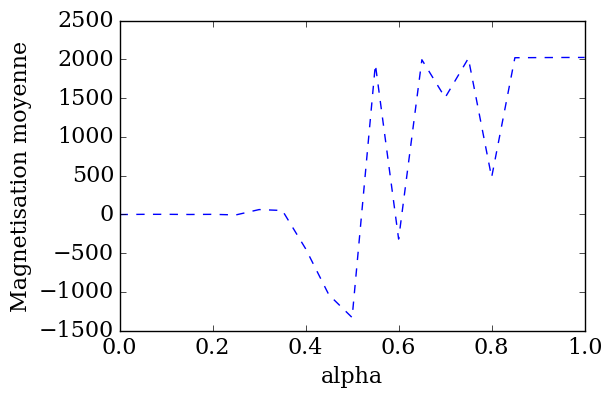

In [117]:
pyplot.figure()
pyplot.plot(alpha_array,magn_moy_alpha_coupee,"--")
pyplot.xlabel('alpha')
pyplot.ylabel('Magnetisation moyenne')

En partant d'un état initial différent de celui du challenge 1, on peut encore tirer la même conclusion quant à la valeur de $\alpha_c$. En effet, on observe que la magnétisation moyenne lorsque l'équilibre est atteint commence à différer de 0 aux alentours de 0,4. Cependant, ici, la magnétisation moyenne n'a pas exactement le même comportement que dans le challenge 1. En effet, la plupart du temps, elle chute brusquement au moins une fois pour des valeurs de $\alpha$ supérieures à 0,4. Cela peut s'expliquer de la manière suivante: les spins constituant le matériau ont tendance à s'aligner dans la même direction pour minimiser l'énergie. Les chutes de magnétisation correspondent donc probablement à des configurations dans lesquelles on trouve des régions du matériau où les spins sont tous orientés dans une même direction et des régions où ils sont tous orientés dans l'autre direction.

*Remarque:* cela peut quand même sembler contre-intuitif: on se serait plutôt attendu à ce que le fait d'imposer des spins up sur les bords favorise l'orientation up de tous les spins intérieurs à l'équilibre. Or, vu les chutes observées dans le graphique de magnétisation, les spins intérieurs semblent s'orienter moins facilement dans la direction up tous ensemble que lorsqu'on n'avait pas imposé de conditions aux bords (dans le challenge 1).

A nouveau avec la fonction définie dans le challenge 1, on peut calculer les énergies moyennes à l'équilibre:

In [126]:
en_moy_alpha_1=numpy.empty([N_alpha_1])
en_moy_alpha_2=numpy.empty([N_alpha_2])

en_moy_alpha_1=en_moy(alpha_array_1,states_alpha_1,NMC1,101)
en_moy_alpha_2=en_moy(alpha_array_2,states_alpha_2,NMC2,301)

Rassemblons les énergies moyennes et portons les en graphique en fonction de $\alpha$:

In [127]:
en_moy_alpha=numpy.concatenate((en_moy_alpha_1,en_moy_alpha_2))

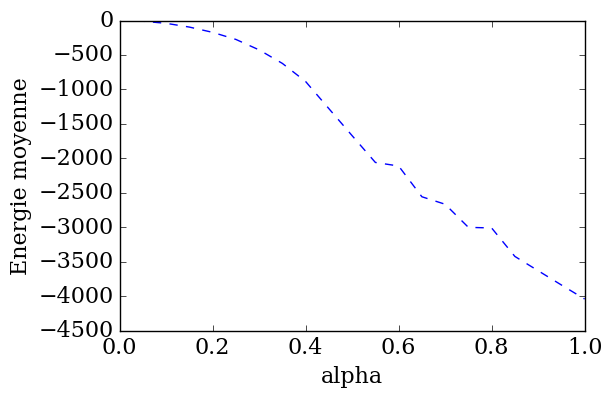

In [128]:
pyplot.figure()
pyplot.plot(alpha_array,en_moy_alpha,"--")
pyplot.xlabel('alpha')
pyplot.ylabel('Energie moyenne')

Pour la condition aux bords choisie, on remarque des légères déviations au comportement linéaire de l'énergie qu'on obtenait dans le challenge précédent pour les $\alpha$ plus grands. Ces déviations correspondent aux chutes de magnétisation évoquées juste avant. Mis à part cela, on retrouve un comportement de l'énergie moyenne assez similaire à ce qu'on avait dans le challenge 1. De plus, les ordres de grandeurs de l'énergie semblent concorder avec notre système (l'énergie en $\alpha=1$ vaut environ $-N_{pairs}=-2.45.(45-1)=-3960$).

Nous allons maintenant traiter rapidement le cas d'une autre condition initiale et d'une autre série de conditions aux bords. Supposons que la condition initiale est la suivante: les spins de 2 bords opposés sont up, les spins sur les bords restants sont down et les spins intérieurs sont orientés aléatoirement. De plus on impose que ces spins aux bords ne changent pas au cours des itérations. Définissons notre état initial:

In [130]:
def initial_state_2(nx,ny):
       
    r = numpy.random.randint(0,2,(nx,ny))
    
    r[r==0] =-1
    
    r[0,:]=1
    r[nx-1,:]=1
    r[1:-1,0]=-1
    r[1:-1,ny-1]=-1

    return r

Observons le comportement de notre système pour quelques $\alpha$:

In [148]:
nx=35
ny=35
sp3=initial_state_2(nx,ny)
NMC=300

In [149]:
sp3_copie=sp3.copy()
alpha=0.2
states_0_2_CL = ising_model_metropolis_CL(sp3_copie, NMC, nx, ny, alpha)

sp3_copie=sp3.copy()
alpha=0.45
states_0_45_CL = ising_model_metropolis_CL(sp3_copie, NMC, nx, ny, alpha)


sp3_copie=sp3.copy()
alpha=0.6
states_0_6_CL = ising_model_metropolis_CL(sp3_copie, NMC, nx, ny, alpha)

On peut observer l'évolution de la magnétisation moyenne:

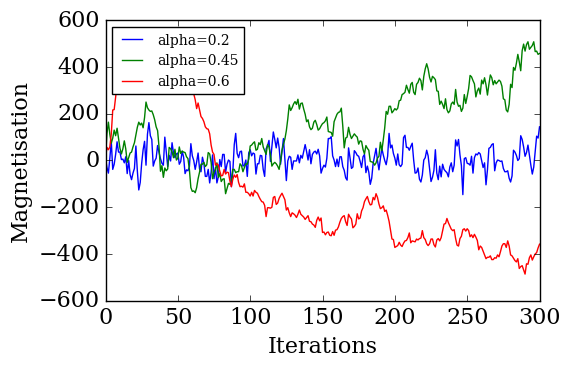

In [150]:
pyplot.figure()
pyplot.plot(states_0_2_CL.sum(axis=(1,2)),label=r'alpha=0.2')
pyplot.plot(states_0_45_CL.sum(axis=(1,2)),label=r'alpha=0.45')
pyplot.plot(states_0_6_CL.sum(axis=(1,2)),label=r'alpha=0.6')
pyplot.legend(loc=2, prop={'size':10})
pyplot.xlabel('Iterations')
pyplot.ylabel('Magnetisation')
pyplot.tight_layout()

A nouveau, en portant en graphique la magnétisation moyenne pour une série de $\alpha$ avec beaucoup plus d'itérations, on décide pour calculer l'énergie de considérer les états
* après la 100ème itération pour les $\alpha$ inférieurs à 0,4 non inclus
* après la 300ème itération pour les $\alpha$ supérieurs à 0,4 inclus, il aurait même fallu aller plus loin mais nous ne le ferons pas pour limiter les temps d'exécution

*Remarque:* on a pris une grille $35 \times 35$ pour atteindre plus rapidement l'équilibre. Calculons les magnétisations moyennes:

In [161]:
nx=35
ny=35

NMC1=200
NMC2=400

alpha_array_1=numpy.arange(0.0,0.4, 0.05)
alpha_array_2=numpy.arange(0.4,1.05,0.05)

N_alpha_1=alpha_array_1.size
N_alpha_2=alpha_array_2.size

In [162]:
# environ 4 min d'exécution
states_alpha_1 = numpy.empty([N_alpha_1,NMC1+1,nx,ny])
states_alpha_2 = numpy.empty([N_alpha_2,NMC2+1,nx,ny])

for i in range(N_alpha_1):
    sp3_copie=sp3.copy()
    states_alpha_1[i] = ising_model_metropolis(sp3_copie, NMC1, nx, ny, alpha_array_1[i])
    
for i in range(N_alpha_2):
    sp3_copie=sp3.copy()
    states_alpha_2[i] = ising_model_metropolis(sp3_copie, NMC2, nx, ny, alpha_array_2[i])

In [163]:
magn_moy_alpha_coupee_1=numpy.empty([N_alpha_1])
magn_moy_alpha_coupee_2=numpy.empty([N_alpha_2])

magn_moy_alpha_coupee_1=magn_moy(alpha_array_1,states_alpha_1,NMC1,101)
magn_moy_alpha_coupee_2=magn_moy(alpha_array_2,states_alpha_2,NMC2,301)

Portons en graphique les magnétisations moyennes en fonction de $\alpha$:

In [165]:
alpha_array=numpy.arange(0.0,1.05, 0.05)
magn_moy_alpha_coupee=numpy.concatenate((magn_moy_alpha_coupee_1,magn_moy_alpha_coupee_2))

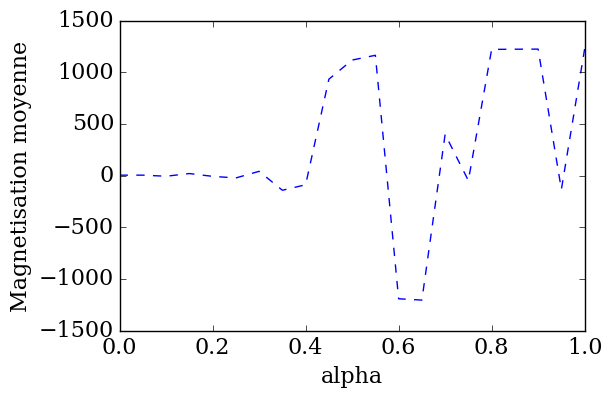

In [166]:
pyplot.figure()
pyplot.plot(alpha_array,magn_moy_alpha_coupee,"--")
pyplot.xlabel('alpha')
pyplot.ylabel('Magnetisation moyenne')

On peut encore tirer les mêmes conclusions en ce qui concerne la valeur de $\alpha_c$. Avec les conditions aux bords choisies (il y a maintenant des spins -1 sur les bords), on remarque que lorsque l'équilibre est atteint, le système peut maintenant présenter une magnétisation maximale négative pour certaines valeurs de $\alpha$, et plus uniquement positive. De plus, on retrouve les chutes de magnétisation évoquées précédemment, liées aux régions du matériau de spins différents.

Regardons maintenant ce qu'on obtient pour les énergies moyennes:

In [167]:
en_moy_alpha_1=numpy.empty([N_alpha_1])
en_moy_alpha_2=numpy.empty([N_alpha_2])

en_moy_alpha_1=en_moy(alpha_array_1,states_alpha_1,NMC1,101)
en_moy_alpha_2=en_moy(alpha_array_2,states_alpha_2,NMC2,301)

In [168]:
en_moy_alpha=numpy.concatenate((en_moy_alpha_1,en_moy_alpha_2))

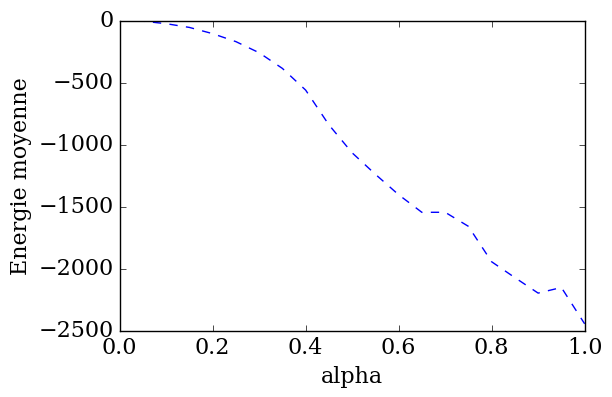

In [169]:
pyplot.figure()
pyplot.plot(alpha_array,en_moy_alpha,"--")
pyplot.xlabel('alpha')
pyplot.ylabel('Energie moyenne')

A nouveau, on observe des déviations (dues aux diminutions de magnétisation) par rapport au comportement linéaire de l'énergie moyenne, précédemment établi pour les grands $\alpha$. De plus, le comportement de l'énergie reste assez similaire à ce qui a été obtenu avant, et les ordres de grandeurs concordent avec notre système.

[Retour](#Table-des-matières)

## Conclusion

Dans ce travail, nous avons étudié les distributions aléatoires proposées par Numpy et avons appliqué des simulations de marches aléatoires pour nous familiariser avec des systèmes stochastiques. Nous avons travaillé sur deux variantes de marche aléatoire. La première, celle de dérive constante, nous a appris que ce terme décalait simplement la moyenne de la gaussienne. La seconde, celle de friction, était plus compliquée à étudier mais nous en avons tiré deux caractéristiques importantes : la moyenne tend vers 0 quand $t$ devient très grand et l'écart-type vers $\alpha / \gamma$.


Nous vons également étudié les matériaux ferromagnétiques, plus précisément la transition de phase que ces matériaux subissent à une certaine température, appelée température critique. Nous avons tenté de déterminer approximativement la valeur de cette température critique (donc de $\alpha$ critique) à l'aide de graphiques de magnétisation moyenne en fonction de $\alpha$. Nous sommes arrivés à la conclusion que la valeur de $\alpha$ critique était entre 0.4 et 0.45, ce qui semble bien se recouper avec la solution de Onsager, environ égale à 0.44. On a pu confirmer ces résultats à partir de graphiques d'énergie moyenne en fonction de $\alpha$. Finalement, nous avons regardé ce qu'il advenait pour une condition initiale et des conditions aux bords différentes. Nous avons alors pu observer des comportements de la magnétisation et de l'énergie quelque peu différents de ce qu'on avait avant, mais qui ont malgré tout permis de confirmer à nouveau la valeur de $\alpha$ critique précédemment estimée.

[Retour](#Table-des-matières)